In [1]:
%matplotlib inline

# Import custom scripts

In [2]:
path_scripts = '/mnt/kauffman/joosts/projects/STRT_epidermis/scripts'

In [3]:
import sys
sys.path.append(path_scripts)

In [4]:
from EPI_misc_scripts_v1_1 import *
from EPI_affinity_propagation_v1_0 import *
from EPI_neg_binom_regression_v1_1 import *
from EPI_pseudotemporal_ordering_v1_0 import *
from EPI_gene_neighbor_network_v1_0 import *

Couldn't import dot_parser, loading of dot files will not be possible.


# Initialize engines

In [5]:
from ipyparallel import Client

In [6]:
c = Client(profile='default')

In [7]:
dview = c[:]

In [8]:
dview.execute('import sys')
dview.execute('sys.path.append("/mnt/kauffman/joosts/projects/STRT_epidermis/scripts")')
dview.execute('from EPI_misc_scripts_v1_1 import *')
dview.execute('from EPI_affinity_propagation_v1_0 import *')
dview.execute('from EPI_neg_binom_regression_v1_1 import *')
dview.execute('from EPI_pseudotemporal_ordering_v1_0 import *')
dview.execute('from EPI_gene_neighbor_network_v1_0 import *')

<AsyncResult: finished>

# Import Data

In [9]:
exp_id = '201509151726'
path_input = '/mnt/kauffman/joosts/projects/STRT_epidermis/data_input/v1.8'
path_output = '/mnt/kauffman/joosts/projects/STRT_epidermis/data_output/v1.8'
path_figures = '/mnt/kauffman/joosts/projects/STRT_epidermis/figures/v1.8'

In [10]:
seq = loadData_v1(path_input, exp_id, 'seq', 'DataFrame')
meta = loadData_v1(path_input, exp_id, 'meta', 'DataFrame')

In [11]:
s_groups_1st = loadData_v1(path_output, exp_id, 's_groups_1st', 'Series')
g_groups_1st = loadData_v1(path_output, exp_id, 'g_groups_1st', 'Series')

In [12]:
meta_sel = meta[s_groups_1st.index]

In [13]:
barcode_summary = loadData_from_pickle_v1(path_input, exp_id, 'barcode_summary')

In [14]:
spikes_ = open('%s/spikes.txt' % path_input,'r').read().split()
mtRNA_ = open('%s/mtRNA.txt' % path_input,'r').read().split()
repeats_ = open('%s/repeats.txt' % path_input,'r').read().split()

# Number of cells that are in 'telogen' and 'late telogen'

In [15]:
stage_data = Counter(meta_sel.ix['hair_cycle_stage'])

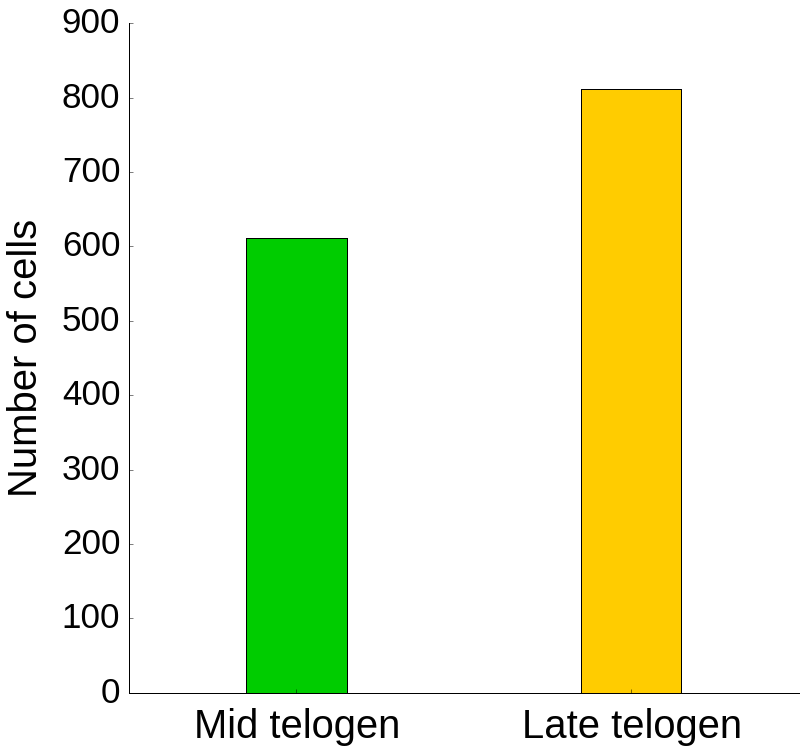

In [16]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (12,12))
ax = plt.axes()

#remove spines and ticks from top and right side

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#set x-axis

ax.set_xlim([-0.5, 1.5])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Mid telogen', 'Late telogen'], family = 'Liberation Sans', fontsize = 40)
ax.tick_params(axis='x', which='major', pad=15)

#set y-axis

ax.set_ylabel('Number of cells', family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(-0.125, 0.5)
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(35) 
                tick.label.set_family('Liberation Sans')
ax.tick_params(axis='y', which='major', pad=10)
            
#plot data

bar_diam = 0.3

ax.bar([0 - (bar_diam * 0.5), 1 - (bar_diam * 0.5)],
       stage_data.values()[::-1], 
       bar_diam,
       color = ['#00CC00', '#FFCC00'],
       linewidth = 1)

figname = 'v1.8_S1_B_Stage_barplot.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Number of cells that are Sca1+ or Sca1-

In [17]:
Sca1_data = Counter(meta_sel.ix['green_flag'])

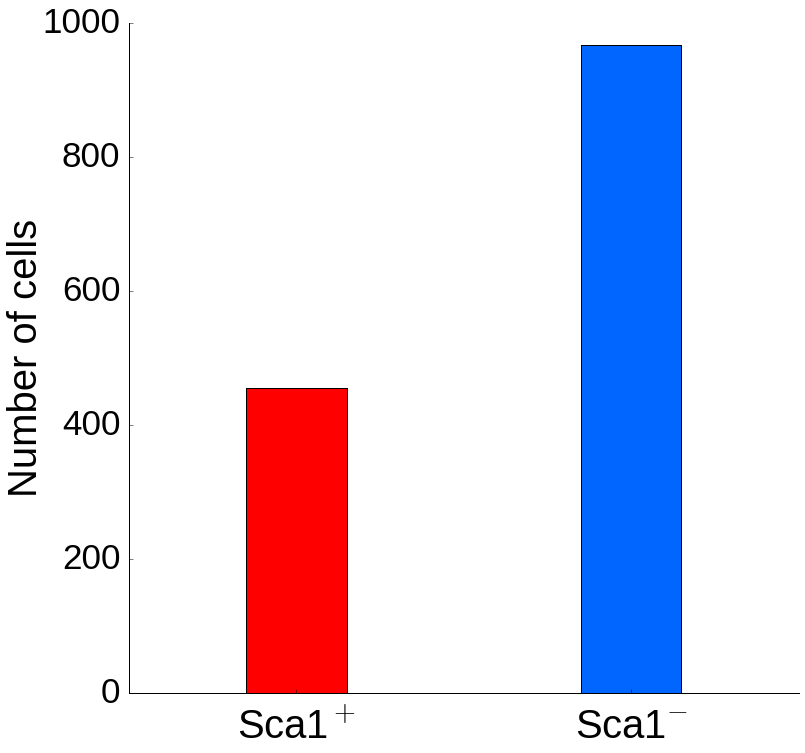

In [18]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (12,12))
ax = plt.axes()

#remove spines and ticks from top and right side

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#set x-axis

ax.set_xlim([-0.5, 1.5])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Sca1$^+$', 'Sca1$^-$'], family = 'Liberation Sans', fontsize = 40)
ax.tick_params(axis='x', which='major', pad=15)

#set y-axis

#ax.set_ylim(0, 1200)
ax.set_ylabel('Number of cells', family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(-0.125, 0.5)
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(35) 
                tick.label.set_family('Liberation Sans')     
ax.tick_params(axis='y', which='major', pad=10)

            
#plot data

bar_diam = 0.3

ax.bar([0 - (bar_diam * 0.5), 1 - (bar_diam * 0.5)],
       Sca1_data.values(), 
       bar_diam,
       color = ['#FF0000', '#0066FF'],
       linewidth = 1)

figname = 'v1.8_S1_D_Sca1_barplot.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Number of cells per IFC

In [19]:
IFC_data = Counter(meta_sel.ix['attached_chip_number'])

In [20]:
IFC_fraction = pd.Series(index = IFC_data.keys())

for IFC in IFC_data.keys():
    
    ix_tmp = meta_sel.ix['attached_chip_number'][meta_sel.ix['attached_chip_number'] == IFC].index
    
    fraction_tmp = Counter(meta_sel.ix['cell_fraction', ix_tmp]).keys()[0]
    
    IFC_fraction.ix[IFC] = fraction_tmp
    
ix_sel = IFC_fraction.order().index[::-1]

In [21]:
cmap_Sca1 = {'Sca1+' : '#FF0000', 'Sca1-' : '#0066FF'}

In [22]:
IFC_mean = np.mean(IFC_data.values())

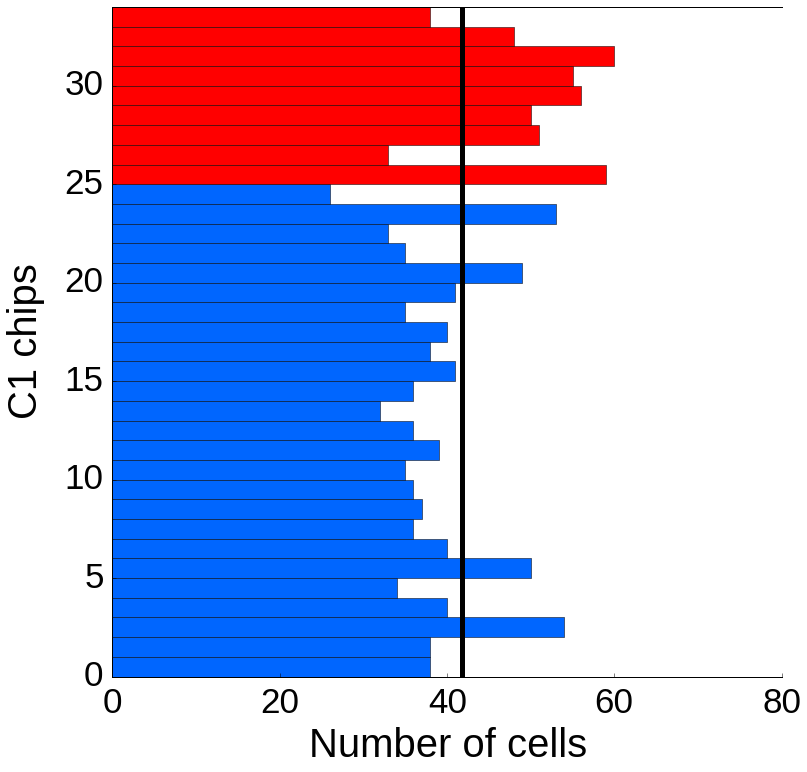

In [23]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (12,12))
ax = plt.axes()

#remove spines and ticks from right side

ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#set x-axis

ax.set_xlim([0, 80])
ax.set_xticks(np.arange(0, 85, 20))
ax.set_xticklabels([str(val) for val in np.arange(0, 85, 20)], family = 'Liberation Sans', fontsize = 35)
ax.set_xlabel('Number of cells', family = 'Liberation Sans', fontsize = 40)
ax.xaxis.set_label_coords(0.5, -0.075)
ax.tick_params(axis='x', which='major', pad=10)

#set y-axis

ax.set_ylim([0, len(IFC_data.keys())])
ax.set_ylabel('C1 chips', family = 'Liberation Sans', fontsize = 40)
ax.set_yticks(np.arange(0, len(IFC_data.keys()), 5))
ax.set_yticklabels([val for val in np.arange(0, len(IFC_data.keys()), 5)], family = 'Liberation Sans', fontsize = 35)
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.tick_params(axis='y', which='major', pad=10)
         
#plot data

ax.barh(range(len(ix_sel)),
        [IFC_data[key] for key in ix_sel],
        height = 1,
        color = [cmap_Sca1[IFC_fraction[key]] for key in ix_sel],
        linewidth = 0.5)

ax.vlines(IFC_mean, 0, len(IFC_data), colors='black', linestyles='solid', linewidth = 5)

figname = 'v1.8_S1_E_Capturing_IFCs.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Cell size distribution - Capturing vs. input

In [24]:
scepter = loadData_v1(path_input, exp_id, 'scepter', 'DataFrame')

In [25]:
#remove all count > 5 micron

scepter = scepter.ix[5.03:]

In [26]:
#multiply in proportion to the number of cells from each experiment/IFC in the dataset

barcode_count = Counter(meta_sel.ix['attached_chip_number'])

scepter_ = scepter.copy()

for bc in scepter_.columns:
    
    scepter[bc] = scepter_[bc] * barcode_count[bc]

In [27]:
#create count data for KDE

scepter_count = []

for ix in scepter.index:
    
    scepter_count += [ix] * int(scepter.ix[ix].sum())

In [28]:
#calculate KDE

scepter_kde = scipy.stats.gaussian_kde(scepter_count)
scepter_kde_x = np.arange(5.0, 20.0, 0.1)
#scepter_kde.set_bandwidth(0.05)
scepter_kde_y = scepter_kde.evaluate(scepter_kde_x)

In [29]:
diam_data = [float(val) for val in meta_sel.ix['diameter(um)']]

In [30]:
#it seems that the Scepter underestimates the cell size by around 0.5 µm compared to the IFC imaging platform 
#(compare e.g. ESCR1 cells used in Islam et al 2014 under microscope vs. in Scepter). 

scepter_kde_x = [val + 0.5 for val in scepter_kde_x]

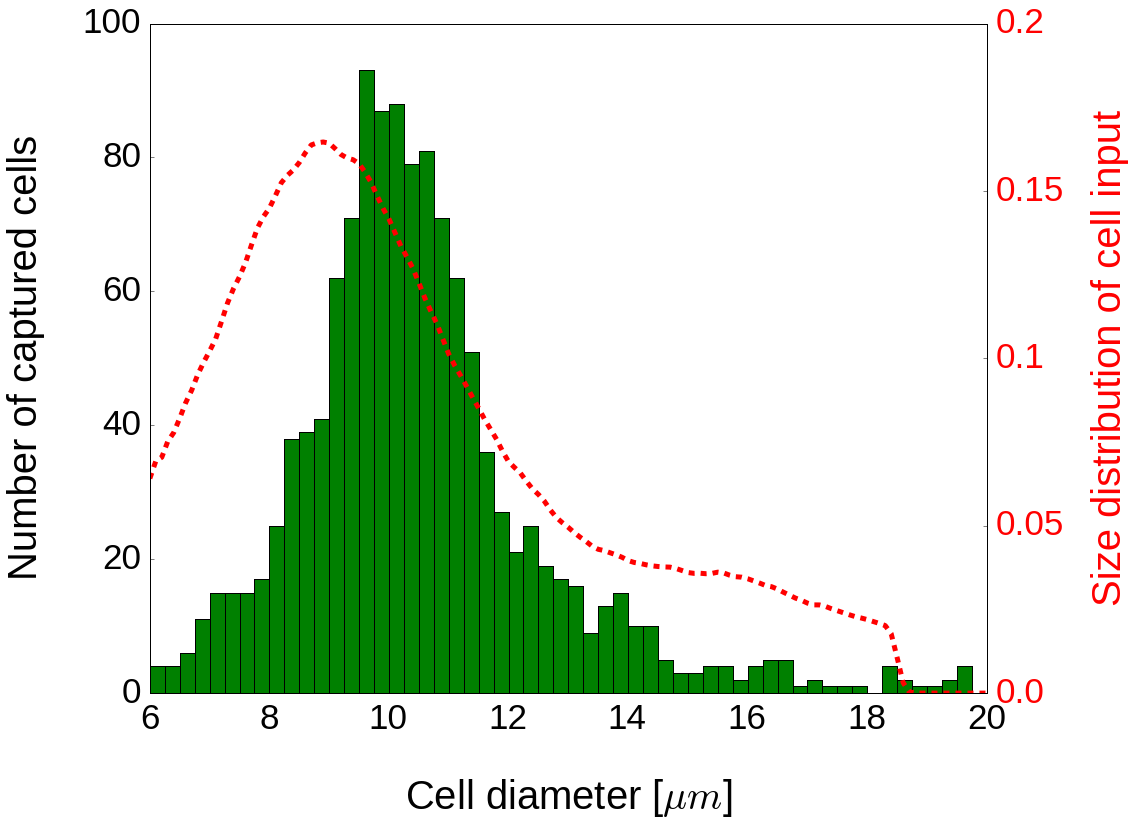

In [31]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (15,12))
ax0 = plt.axes()

#remove spines and ticks from top side

ax0.spines['top'].set_color('none')
ax0.xaxis.set_ticks_position('bottom')

#set x-axis

ax0.set_xlim(6.0, 20.0)
ax0.xaxis.set_label_text('Cell diameter [$\mu m$]', fontsize = 40, family = 'Liberation Sans')
ax0.set_xticks(np.arange(6.0, 21.0, 2))
ax0.set_xticklabels([str(val) for val in np.arange(6, 21, 2)], family = 'Liberation Sans', fontsize = 35)
ax0.xaxis.set_label_coords(0.5, -0.125)
ax0.tick_params(axis='x', which='major', pad=10)

#set left y-axis

ax0.set_ylim(0.0, 100)
ax0.yaxis.set_label_text('Number of captured cells', fontsize = 40, family = 'Liberation Sans')
ax0.set_yticks(np.arange(0, 101, 20))
ax0.set_yticklabels([str(val) for val in np.arange(0, 101, 20)], family = 'Liberation Sans', fontsize = 35)
ax0.yaxis.set_label_coords(-0.125, 0.5)
ax0.tick_params(axis='y', which='major', pad=10)

#set right y-axis

ax1 = ax0.twinx()
ax1.set_xlim(6.0, 20.0)
ax1.set_ylim(0.0, 0.2)
ax1.yaxis.set_label_text('Size distribution of cell input', color = 'red', family = 'Liberation Sans', fontsize = 40)
ax1.set_yticks(np.arange(0, 0.21, 0.05))
ax1.set_yticklabels([str(val) for val in np.arange(0, 0.21, 0.05)], family = 'Liberation Sans', fontsize = 35, color = 'red')
ax1.yaxis.set_label_coords(1.125, 0.5)
ax1.tick_params(axis='y', which='major', pad=10)

#plot histogram

ax0.hist(   diam_data, 
            bins = np.arange(5.0, 20.0, 0.25),
            color = 'green')

#plot KDE

ax1.plot(scepter_kde_x, scepter_kde_y, linewidth = 5, color = 'red', linestyle = '--')

figname = 'v1.8_S1_F_Size_distribution.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Averaged mapped reads per IFC

In [32]:
#generate data

IFCs = set(meta.ix['attached_chip_number'])

TMR = pd.DataFrame(index = IFCs, columns = ['sum', 'mean', 'std'])

for IFC in IFCs:
    
    ix_tmp = meta.ix['attached_chip_number'][meta.ix['attached_chip_number'] == IFC].index
    TMR.ix[IFC, 'sum'] = barcode_summary.ix['Total mapped reads by barcode', ix_tmp].sum()
    TMR.ix[IFC, 'mean'] = barcode_summary.ix['Total mapped reads by barcode', ix_tmp].mean()
    TMR.ix[IFC, 'std'] = barcode_summary.ix['Total mapped reads by barcode', ix_tmp].std()

In [33]:
IFC_data = Counter(meta.ix['attached_chip_number'])

IFC_fraction = pd.Series(index = IFC_data.keys())

for IFC in IFC_data.keys():
    
    ix_tmp = meta.ix['attached_chip_number'][meta.ix['attached_chip_number'] == IFC].index
    
    fraction_tmp = Counter(meta.ix['cell_fraction', ix_tmp]).keys()[0]
    
    IFC_fraction.ix[IFC] = fraction_tmp
    
ix_sel = IFC_fraction.order().index[::-1]

In [34]:
cmap_Sca1 = {'Sca1+' : '#FF0000', 'Sca1-' : '#0066FF'}

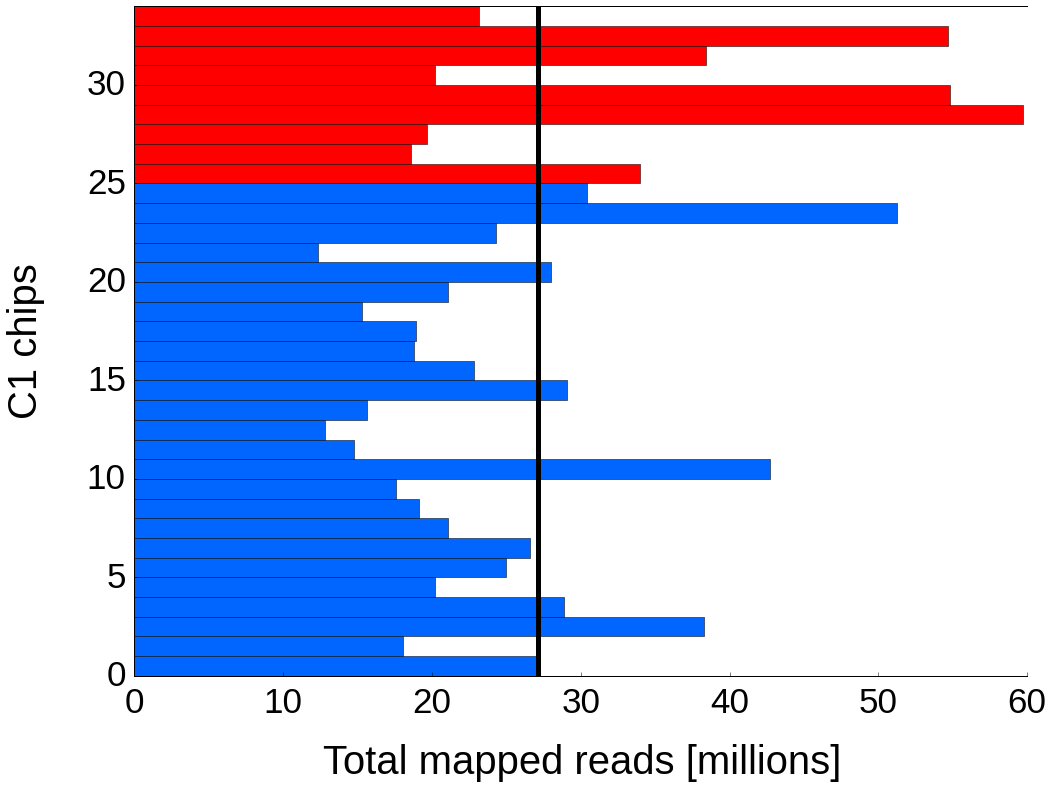

In [35]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (16,12))
ax = plt.axes()

#remove spines and ticks from right side

ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#set x-axis

ax.set_xlim([0, 60000000])
ax.set_xticks([0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000])
ax.set_xticklabels([0, 10, 20, 30, 40, 50, 60], family = 'Liberation Sans', fontsize = 35)
ax.tick_params(axis='x', which='major', pad=10)
ax.set_xlabel('Total mapped reads [millions]', family = 'Liberation Sans', fontsize = 40)
ax.xaxis.set_label_coords(0.5, -0.1)

#set y-axis

ax.set_ylim([0, len(TMR.index)])
ax.set_ylabel('C1 chips', family = 'Liberation Sans', fontsize = 40)
ax.set_yticks(np.arange(0, len(TMR.index), 5))
ax.set_yticklabels([val for val in np.arange(0, len(TMR.index), 5)], family = 'Liberation Sans', fontsize = 35)
ax.tick_params(axis='y', which='major', pad=10)
ax.yaxis.set_label_coords(-0.1, 0.5)

#plot data

ax.barh(range(len(TMR.index)),
        [TMR.ix[index, 'sum'] for index in ix_sel],
        height = 1,
        color = [cmap_Sca1[IFC_fraction[key]] for key in ix_sel],
        linewidth = 0.5)

ax.vlines(TMR['sum'].mean(), 0, len(TMR.index), colors='black', linestyles='solid', linewidth = 5)

figname = 'v1.8_S1_G_IFC_total_mapped_read.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Averaged mapped reads per cell per IFC

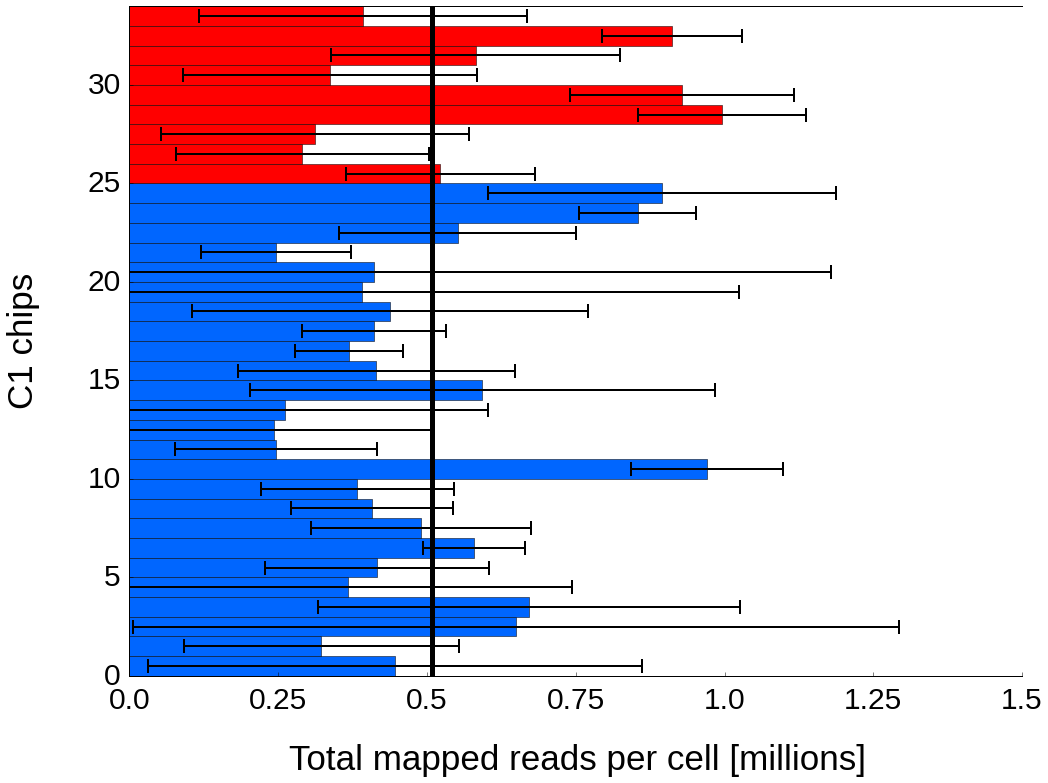

In [36]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (16,12))
ax = plt.axes()

#remove spines and ticks from right side

ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#set x-axis

ax.set_xlim([0, 1500000])
ax.set_xticks([0, 250000, 500000, 750000, 1000000, 1250000, 1500000])
ax.set_xticklabels([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5], family = 'Liberation Sans', fontsize = 30)
ax.set_xlabel('Total mapped reads per cell [millions]', family = 'Liberation Sans', fontsize = 35, labelpad = 25)
ax.tick_params(axis='x', which='major', pad=10)
ax.xaxis.set_label_coords(0.5, -0.1)

#set y-axis

ax.set_ylim([0, len(TMR.index)])
ax.set_ylabel('C1 chips', family = 'Liberation Sans', fontsize = 35, labelpad = 25)
ax.set_yticks(np.arange(0, len(TMR.index), 5))
ax.set_yticklabels([val for val in np.arange(0, len(TMR.index), 5)], family = 'Liberation Sans', fontsize = 30)
ax.tick_params(axis='y', which='major', pad=10)
ax.yaxis.set_label_coords(-0.1, 0.5)

#plot data

ax.barh(range(len(TMR.index)),
        [TMR.ix[index, 'mean'] for index in ix_sel],
        height = 1,
        color = [cmap_Sca1[IFC_fraction[key]] for key in ix_sel],
        xerr = [TMR.ix[index, 'std'] for index in TMR.index],
        linewidth = 0.5,
        ecolor = 'black', error_kw = dict(elinewidth=2, capsize = 7, capthick = 2))

ax.vlines(TMR['mean'].mean(), 0, len(TMR.index), colors='black', linestyles='solid', linewidth = 5)

figname = 'v1.8_S1_H_IFC_total_reads_per_cell.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Breakdown of all reads

In [37]:
BS_mean = barcode_summary[s_groups_1st.index].sum(axis = 1)

In [38]:
exon = BS_mean['Total molecules mapped to EXON']
splice_junction = BS_mean['Total molecules mapped to SPLC']
upstream = BS_mean['Total molecules mapped to USTR']
downstream = BS_mean['Total molecules mapped to DSTR']
intron = BS_mean['Total molecules mapped to INTR']
antisense = BS_mean['Total molecules mapped to AEXON'] + BS_mean['Total molecules mapped to AINTR'] + BS_mean['Total molecules mapped to AUSTR'] + BS_mean['Total molecules mapped to ADSTR'] 
unannotated = BS_mean['Non-annotated molecules by barcode']

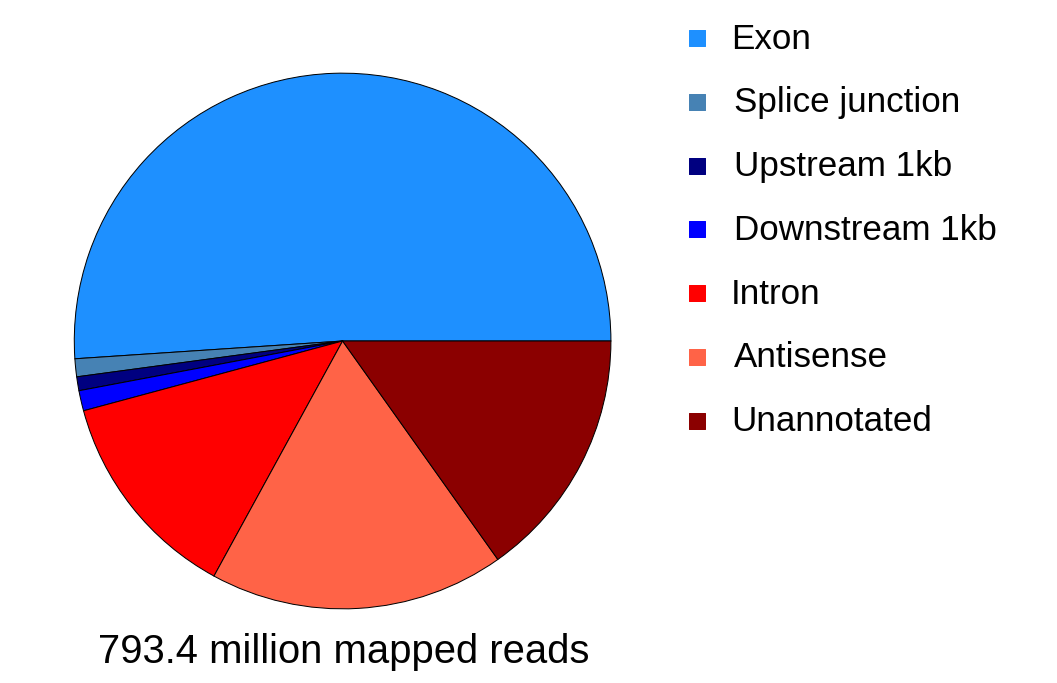

In [39]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (18.7,12))
GS = plt.GridSpec(1,2,wspace=0.0,hspace=0.0,width_ratios=[9,5])

#initialize data and colormap

pie_data1 = [exon, splice_junction, upstream, downstream, intron, antisense, unannotated]
pie_color1 = ['dodgerblue', 'steelblue', 'navy', 'blue', 'red', 'tomato', 'darkred']

#plot pie chart

ax0 = fig.add_subplot(GS[0])
ax0.pie(pie_data1, colors = pie_color1, shadow = False)

#plot number of mapped reads

MR = round(BS_mean['Total mapped reads by barcode'] / 1000000.0, 1)

ax0.text(0, -1.2, '%s million mapped reads' % (MR), fontsize = 40, family = 'Liberation Sans', ha = 'center')

#plot legend

ax1 = fig.add_subplot(GS[1])

ax1.set_xlim(0, 10)
ax1.set_ylim(- 10, 0.5)

xpos = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
ypos = [0, -1, -2, -3, -4, -5, -6]

labels = ['Exon','Splice junction','Upstream 1kb','Downstream 1kb','Intron','Antisense','Unannotated']

ax1.scatter (xpos, ypos, color = pie_color1, marker = 's', s = 250)

for string in labels:
    
    ax1.text(x = xpos[labels.index(string)] + 1,
             y = ypos[labels.index(string)],
             s = string,
             family = 'Liberation Sans',
             fontsize = 35,
             va = 'center', ha = 'left')
    
clean_axis(ax1)

figname = 'v1.8_S1_I1_Read_breakup.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [40]:
#generate data

mtRNA = seq.ix[mtRNA_, s_groups_1st.index].sum(axis=0).sum()
mRNA = dropNull(seq[s_groups_1st.index], path_input, cutoff_mean = 0.00).sum(axis=0).sum() - mtRNA
spikes = seq.ix[spikes_, s_groups_1st.index].sum(axis=0).sum()
repeats = seq.ix[repeats_, s_groups_1st.index].sum(axis=0).sum()


Dropping spikes from dataset

Dropping repeats from dataset

Dropping unexpressed genes from dataset


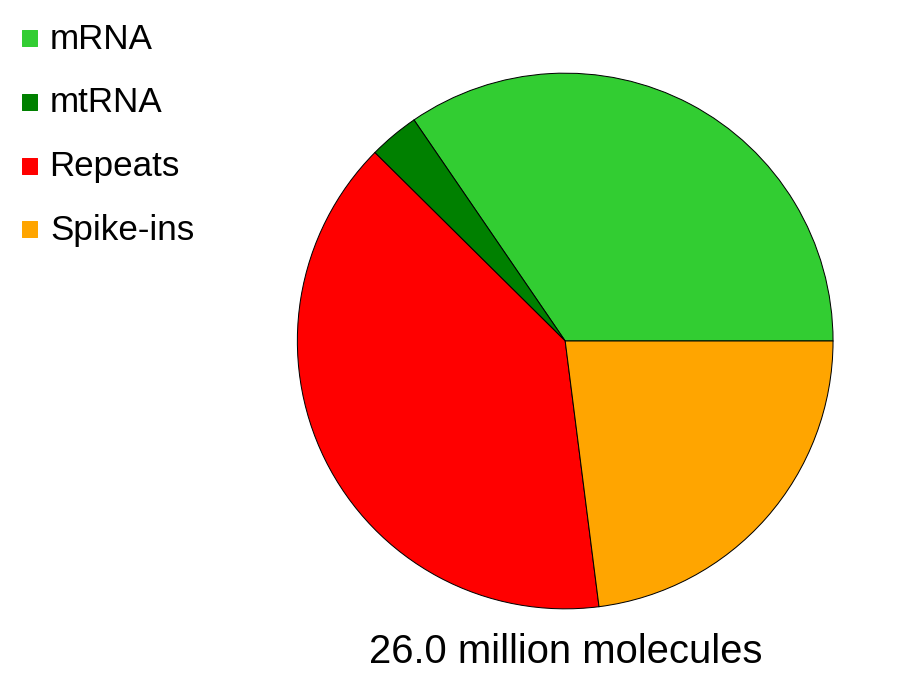

In [41]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (16,12))
GS = plt.GridSpec(1,2,wspace=0.0,hspace=0.0,width_ratios=[3,9])

#initialize data and colormap

pie_data2 = [mRNA, mtRNA, repeats, spikes]
pie_color2 = ['limegreen', 'green', 'red', 'orange']

#plot pie chart

ax0 = fig.add_subplot(GS[1])
ax0.pie(pie_data2, colors = pie_color2, shadow = False)

#plot number of molecules

MOL = round(np.sum([mRNA, mtRNA, repeats, spikes]) / 1000000., 1)

ax0.text(0, -1.2, '%s million molecules' % (MOL), fontsize = 40, family = 'Liberation Sans', ha = 'center')

#plot legend

ax1 = fig.add_subplot(GS[0])

ax1.set_xlim(0, 10)
ax1.set_ylim(- 10, 0.5)

xpos = [1, 1, 1, 1]
ypos = [0, -1, -2, -3]

labels = ['mRNA','mtRNA','Repeats','Spike-ins']

ax1.scatter (xpos, ypos, color = pie_color2, marker = 's', s = 250)

for string in labels:
    
    ax1.text(x = xpos[labels.index(string)] + 1,
             y = ypos[labels.index(string)],
             s = string,
             family = 'Liberation Sans',
             fontsize = 35,
             va = 'center', ha = 'left')
    
clean_axis(ax1)

figname = 'v1.8_S1_I2_Read_breakup.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Reads per molecule

In [42]:
reads_per_mol_input = open('%s/%s_readspermol.tab' % (path_input, exp_id),'r').readlines()[2].split()

reads_per_mol = pd.DataFrame(index = ['Count', 'Fraction'], columns = range(1, len(reads_per_mol_input)))

for no, count in enumerate(reads_per_mol_input[1:]):
    
    reads_per_mol.ix['Count', no + 1] = int(count)
    
reads_per_mol.ix['Fraction'] = reads_per_mol.ix['Count'] / reads_per_mol.ix['Count'].sum()

In [43]:
reads_per_mol_mean = np.sum([(no + 1) * count for no, count in enumerate(reads_per_mol.ix['Count'])]) / float(reads_per_mol.ix['Count'].sum())

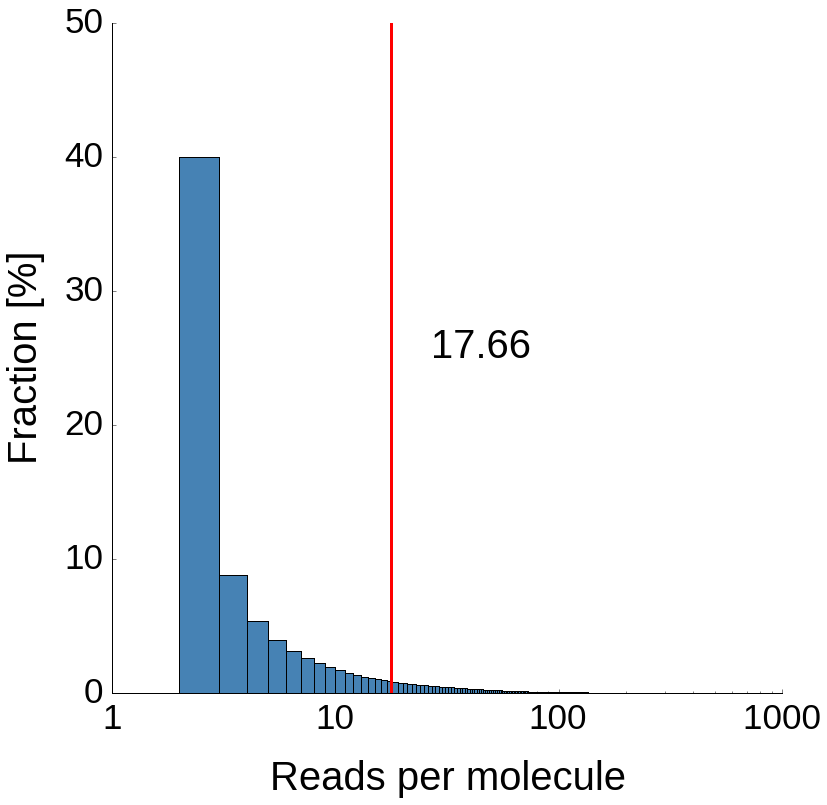

In [44]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (12,12))
ax0 = plt.axes()

#remove spines and ticks from right and top side

ax0.spines['top'].set_color('none')
ax0.xaxis.set_ticks_position('bottom')
ax0.spines['right'].set_color('none')
ax0.yaxis.set_ticks_position('left')

#define x-axis

ax0.set_xscale('log')
ax0.set_xlim(1, 1000)
ax0.set_xticks([1, 10, 100, 1000])
ax0.set_xticklabels(['1', '10', '100', '1000 '], family = 'Liberation Sans', fontsize = 35)
ax0.set_xlabel('Reads per molecule', family = 'Liberation Sans', fontsize = 40)
ax0.tick_params(axis='x', which='major', pad=10)
ax0.xaxis.set_label_coords(0.5, -0.1)

#define y-axis

ax0.set_ylim(0, 0.5)
ax0.set_yticks([0.00, 0.10, 0.20, 0.30, 0.40, 0.50])
ax0.set_yticklabels([0, 10, 20, 30, 40, 50], family = 'Liberation Sans', fontsize = 35)
ax0.set_ylabel('Fraction [%]', family = 'Liberation Sans', fontsize = 40)
ax0.tick_params(axis='y', which='major', pad=10)
ax0.yaxis.set_label_coords(-0.1, 0.5)

#plot histogram

ax0.bar(reads_per_mol.columns, reads_per_mol.ix['Fraction'], color = 'steelblue', width = 1)

#plot mean line

ax0.axvline(x = reads_per_mol_mean,
            ymin = 0, ymax = 1,
            color = 'red', linewidth = 3)

ax0.text(reads_per_mol_mean + 10,
         ax0.get_ylim()[1] * 0.5,
         '%s' % (np.round(np.mean(reads_per_mol_mean), 2)),
         family = 'Liberation Sans', fontsize = 40)

figname = 'v1.8_S1_J_Reads_per_molecule.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Single-cell yield

In [45]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

In [46]:
#define ylim

y_min = 0
y_max = 40000

#generate order data

yield_order = np.sort([float(val) for val in meta.ix['sum_transcripts']])

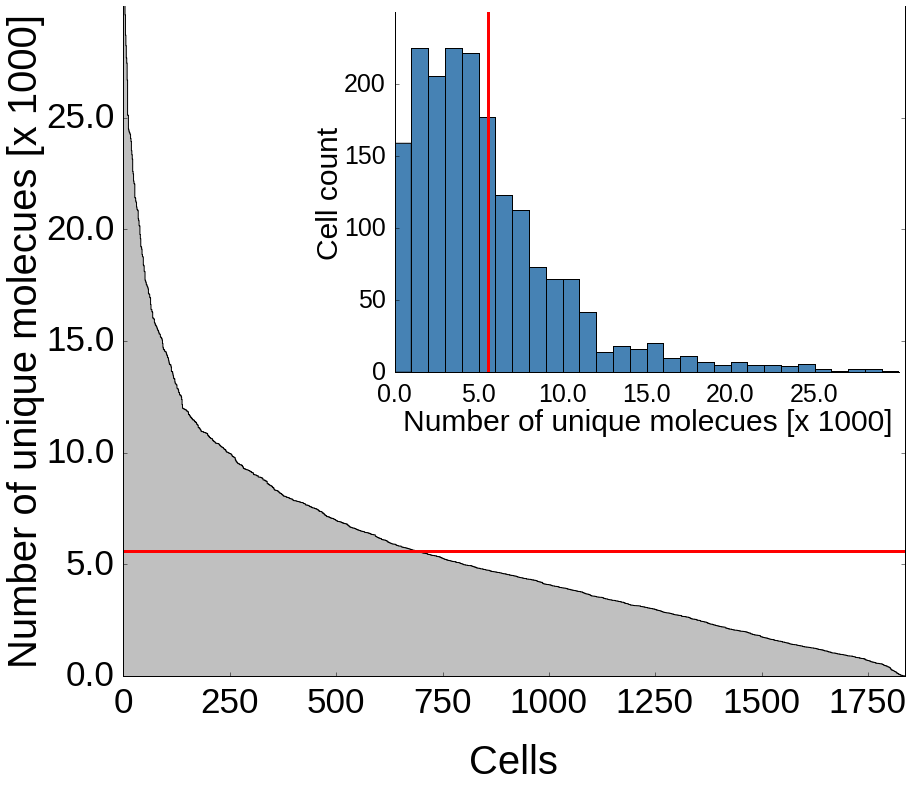

In [47]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (14,12))
ax0 = plt.axes()

#remove spines and ticks from right and top side

ax0.spines['top'].set_color('none')
ax0.xaxis.set_ticks_position('bottom')

#set bottom x-axis

ax0.set_xlim(0, len(meta.columns))
ax0.set_xticks(np.arange(0, len(meta.columns), 250))
ax0.set_xticklabels(np.arange(0, len(meta.columns), 250), family = 'Liberation Sans', fontsize = 35)
ax0.set_xlabel('Cells', family = 'Liberation Sans', fontsize = 40)
ax0.tick_params(axis='x', which='major', pad=10)
ax0.xaxis.set_label_coords(0.5, -0.1)

#set y-axis

ax0.set_ylim(0, 30000)
ax0.set_yticks(np.arange(0, 30000, 5000))
ax0.set_yticklabels(np.arange(0, 30000, 5000) / 1000.0, family = 'Liberation Sans', fontsize = 35)
ax0.set_ylabel('Number of unique molecues [x 1000]', family = 'Liberation Sans', fontsize = 40)
ax0.tick_params(axis='y', which='major', pad=10)
ax0.yaxis.set_label_coords(-0.1, 0.5)

#plot waterfall chart

ax0.bar(range(len(meta.columns)),
        yield_order[::-1],
        width=1.0,
        linewidth = 0.0,
        edgecolor = 'silver',
        color = 'silver')

#plot step and fill

ax0.step(range(len(meta.columns) + 1),
         list(yield_order[::-1]) + [yield_order[0]],
         where = 'post', color = 'black', linewidth = 1)

#plot mean

ax0.axhline(y = np.mean(yield_order), linewidth = 3, color = 'red')

#axes inset

ax_inset = inset_axes(ax0, 
                      7, 
                      5,
                      loc = 1)

ax_inset.spines['top'].set_color('none')
ax_inset.spines['right'].set_color('none')
ax_inset.xaxis.set_ticks_position('bottom')
ax_inset.yaxis.set_ticks_position('left')

ax_inset.set_xlim(0, 30000)
ax_inset.set_xticks(np.arange(0, 30000, 5000))
ax_inset.set_xticklabels(np.arange(0, 30000, 5000) / 1000.0, family = 'Liberation Sans', fontsize = 25)
ax_inset.set_xlabel('Number of unique molecues [x 1000]', family = 'Liberation Sans', fontsize = 30)
ax_inset.tick_params(axis='x', which='major', pad=10)
ax_inset.xaxis.set_label_coords(0.5, -0.1)

ax_inset.set_ylim(0, 250)
ax_inset.set_yticks(np.arange(0, 250, 50))
ax_inset.set_yticklabels(np.arange(0, 250, 50), family = 'Liberation Sans', fontsize = 25)
ax_inset.set_ylabel('Cell count', family = 'Liberation Sans', fontsize = 30)
ax_inset.tick_params(axis='y', which='major', pad=10)
ax_inset.yaxis.set_label_coords(-0.1, 0.5)

ax_inset.hist(yield_order, bins = np.arange(0, 40000, 1000), orientation = 'vertical', color = 'steelblue')

ax_inset.axvline(x = np.mean(yield_order), linewidth = 3, color = 'red')

figname = 'v1.8_S1_K_Yield_waterfall_plot.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Spike detection efficieny

In [72]:
"""
Nota bene: spike ERCC-00097 seems to be higher expressed as possible in plate 1772071032 and we are unable to find
the problem. In consequence, we will exclude it in the following analyses.
"""

spikes_ = [s for s in spikes_ if s != 'ERCC-00097']

In [73]:
seq_spikes = seq.ix[spikes_, s_groups_1st.index]

In [74]:
#import spike counts and generate spike seq

spike_count = pd.read_csv('%s/spike_count.txt' % path_input, sep = '\t', index_col = 0)

spike_seq = seq_spikes.ix[spike_count.index, s_groups_1st.index]

In [75]:
len(spike_count)

92

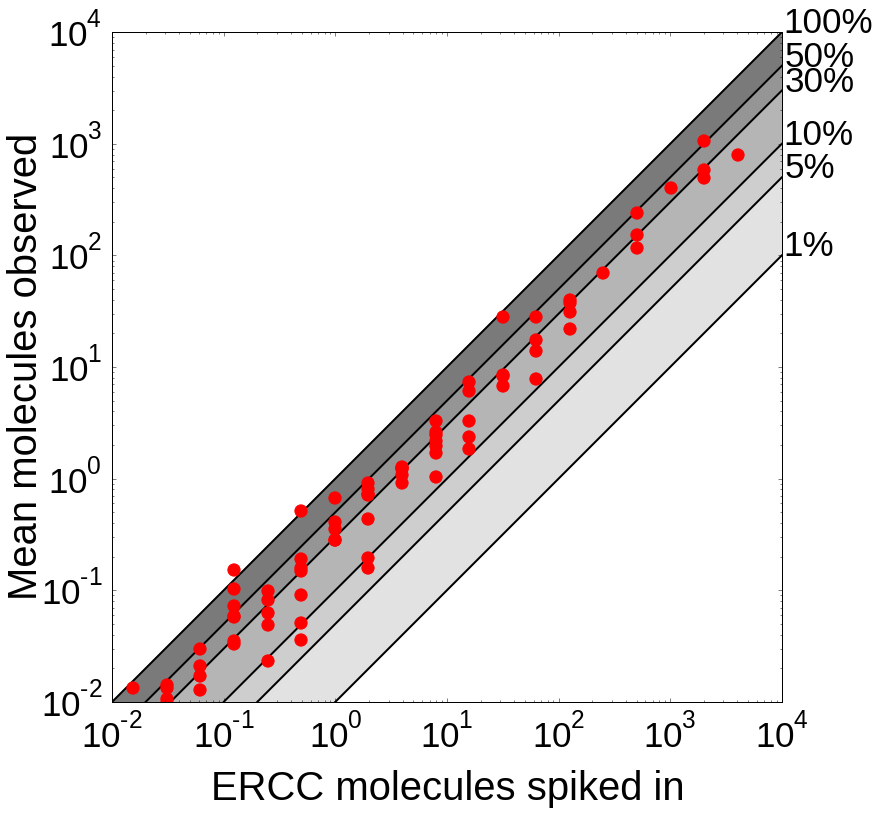

In [77]:
#generate figure

plt.figure(facecolor = 'w', figsize = (12,12))
ax0 = plt.axes()

#define y-axis

ax0.set_yscale('log')
ax0.set_ylim(0.01, 10000)
ax0.set_ylabel('Mean molecules observed', family = 'Liberation Sans', fontsize = 40)
for t in ax0.yaxis.get_major_ticks():
    t.label.set_fontsize(35)
    t.label.set_family('Liberation Sans')
ax0.tick_params(axis='x', which='major', pad=10)
ax0.xaxis.set_label_coords(0.5, -0.1)

#define y-axis

ax0.set_xscale('log')
ax0.set_xlim(0.01, 10000)
ax0.set_xlabel('ERCC molecules spiked in', family = 'Liberation Sans', fontsize = 40)
for t in ax0.xaxis.get_major_ticks():
    t.label.set_fontsize(35)
    t.label.set_family('Liberation Sans')
ax0.tick_params(axis='y', which='major', pad=10)
ax0.yaxis.set_label_coords(-0.1, 0.5)

#plot % lines

spike_lines = [0.01, 10000]

per = [1.0, 0.5, 0.3, 0.1, 0.05, 0.01]
c_per = [0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
per_text = ['100%','50%','30%','10%','5%','1%']

for pos in range(len(per)):
        
    ax0.plot(spike_lines,
             [val * per[pos] for val in spike_lines],
             linewidth = 2,
             color = 'black', alpha = 1.0, zorder = 1)
        
    ax0.text(11000,
             [val * per[pos] for val in spike_lines][1],
             per_text[pos],
             family = 'Liberation Sans',
             fontsize = 35)
        
    if pos > 0:
    
        ax0.fill_between(spike_lines,
                         [val * per[pos-1] for val in spike_lines],
                         [val * per[pos] for val in spike_lines],
                         color = plt.cm.Greys(c_per[pos]))
        
#plot scatter

ax0.scatter(spike_count['Added'],
            spike_seq.mean(axis=1),
            s = 150,
            color = 'red', zorder = 2)


figname = 'v1.8_S1_L_Spikes_1.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

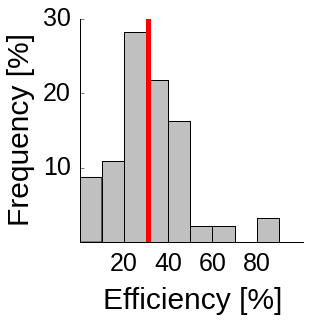

In [81]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (4,4))
ax0 = plt.axes()

ax_inset = plt.subplot()

ax_inset.spines['top'].set_color('none')
ax_inset.spines['right'].set_color('none')
ax_inset.xaxis.set_ticks_position('bottom')
ax_inset.yaxis.set_ticks_position('left')

ax_inset.hist(spike_seq.mean(axis=1) / spike_count['Added'], bins = 10, range = (0,1), color = 'silver')

len_tmp = len(spike_seq.mean(axis=1))

ax_inset.axvline(x = np.median(spike_seq.mean(axis=1) / spike_count['Added']), linewidth = 5, color = 'red')

ax_inset.set_xlim(0, 1.01)
ax_inset.set_xticks([0.2, 0.4, 0.6, 0.8])
ax_inset.set_xticklabels([20,40,60,80], family = 'Liberation Sans', fontsize = 25)
ax_inset.set_xlabel('Efficiency [%]', family = 'Liberation Sans', fontsize = 30)
ax_inset.tick_params(axis='x', which='major', pad=10)
ax_inset.xaxis.set_label_coords(0.5, -0.2)

ax_inset.set_ylim(0, 0.3 * len(spike_seq.index))
ax_inset.set_yticks([0.1 * len(spike_seq.index),0.2 * len(spike_seq.index), 0.3 * len(spike_seq.index)])
ax_inset.set_yticklabels([10,20,30], family = 'Liberation Sans', fontsize = 25)
ax_inset.set_ylabel('Frequency [%]', family = 'Liberation Sans', fontsize = 30)
ax_inset.tick_params(axis='y', which='major', pad=10)
ax_inset.yaxis.set_label_coords(-0.2, 0.5)

figname = 'v1.8_S1_L_Spikes_1_inset.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Fraction of spikes detected

In [82]:
#calculate fraction

spike_fractions = np.sum(spike_seq > 0, axis = 1) / len(spike_seq.columns) * 100

In [83]:
#fit sigmoid function

from scipy.optimize import leastsq

def logistic4(x, A, B, C, D):
    return ((A-D)/(1.0+((x/C)**B))) + D

def residuals(p, y, x):
    A,B,C,D = p
    err = y-logistic4(x, A, B, C, D)
    return err

xdata = [float(val) for val in spike_count['Added']]
ydata = [float(val) for val in spike_fractions]

p0 = [0, 1, 1, 1]

fit = leastsq(residuals, p0, args=(ydata, xdata))

fit_x = np.logspace(-2, 4, num = 2000)
fit_y = [logistic4(x, *fit[0]) for x in fit_x]

In [84]:
#find y = 50 value

def logistic4_x(y, A, B, C, D):
    return C * ((((A-D)/(y-D))-1)**(1.0/B))

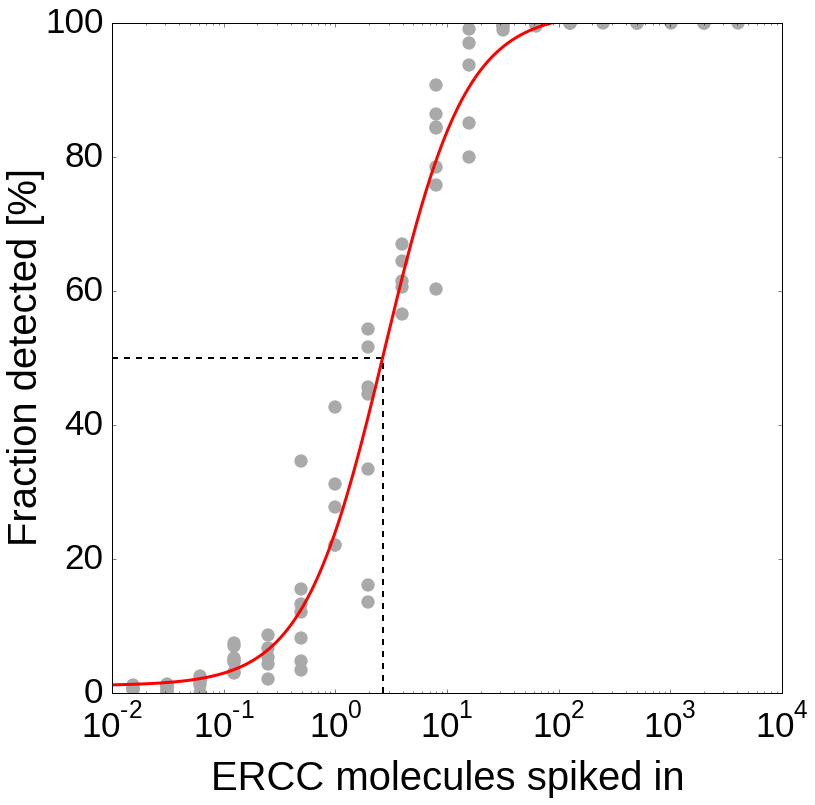

In [85]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (12,12))
ax0 = plt.axes()

#define x-axis

ax0.set_xscale('log')
ax0.set_xlim(0.01, 10000)
ax0.set_xlabel('ERCC molecules spiked in', family = 'Liberation Sans', fontsize = 40)

for t in ax0.xaxis.get_major_ticks():
    t.label.set_fontsize(35)
    t.label.set_family('Liberation Sans')
    
ax0.tick_params(axis='x', which='major', pad=10)
ax0.xaxis.set_label_coords(0.5, -0.1)
    
#define y-axis

ax0.set_ylim(0, 100)
ax0.set_yticks([0, 20, 40, 60, 80, 100])
ax0.set_yticklabels([0, 20, 40, 60, 80, 100])
ax0.set_ylabel('Fraction detected [%]', family = 'Liberation Sans', fontsize = 40)

for t in ax0.yaxis.get_major_ticks():
    t.label.set_fontsize(35)
    t.label.set_family('Liberation Sans')
    
ax0.tick_params(axis='y', which='major', pad=10)
ax0.yaxis.set_label_coords(-0.1, 0.5)
    
#plot scatter

ax0.scatter(xdata,
            ydata,
            s = 150, color = 'darkgrey')

ax0.plot(fit_x, fit_y, linewidth = 3, color = 'red')

#plot 50% marker

y = 50
x = logistic4_x(y, *fit[0])

ax0.hlines(y = y, xmin = 0.01, xmax = x, linestyle = '--', color = 'black', linewidth = 2)
ax0.vlines(x = x, ymin = 0, ymax = 50, linestyle = '--', color = 'black', linewidth = 2)

figname = 'v1.8_S1_M_Spikes_2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Spikes correlation

In [96]:
#generate correlation matrix

spike_seq_log = log2Transform(spike_seq)

spike_corr = spike_seq_log.corr().ix[s_groups_1st.index, s_groups_1st.index]


Calculating binary logarithm of x + 1


In [97]:
cmap_1st = {2:'#00CC00',
          1:'#FFE000',
          8:'#FF9900',
          0:'#FF3300',
          10:'#CC0000',
          6:'#cab2d6',
          3:'#A68BC2',
          4:'#65429A',
          5:'#000066',
          7:'#0066FF',
          9:'#33CCCC',
          11:'#FF99CC',
          12:'#660033'}

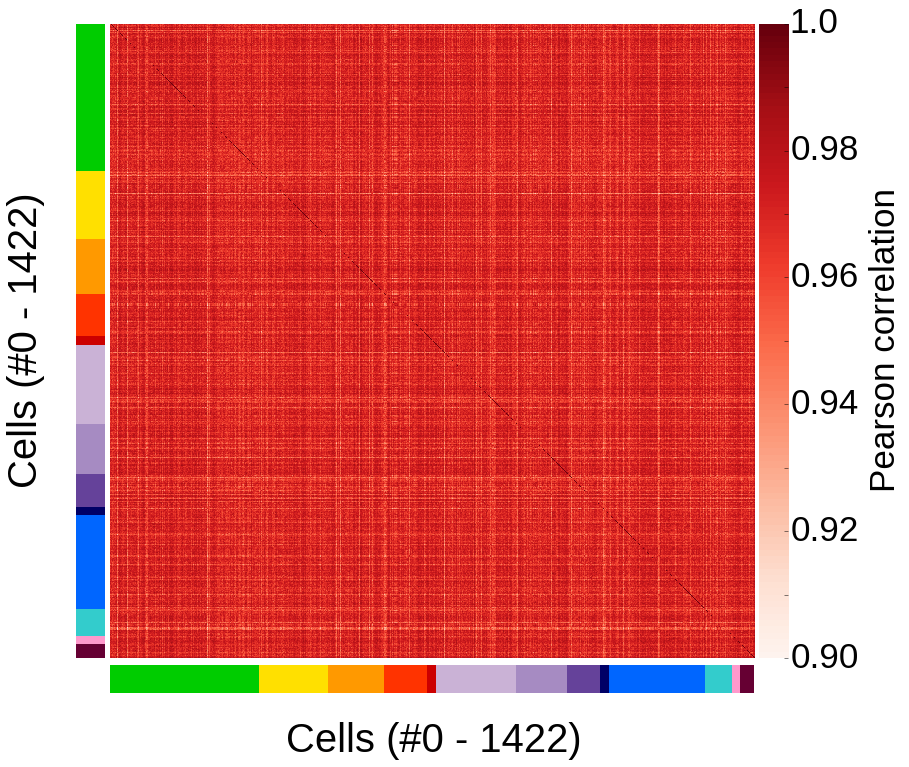

In [98]:
#generate figure

fig = plt.figure(facecolor = 'w', figsize = (12.75, 12))
gs = plt.GridSpec(nrows = 2, ncols = 3, wspace=0.02, hspace=0.02, width_ratios=[0.5 , 11.25, 0.5], height_ratios=[11.25, 0.5])

#plot heatmap

clist_1st = [(cmap_1st[val]) for val in s_groups_1st.values]

axHM = plt.subplot(gs[0, 1])

axHM.matshow(spike_corr, cmap = plt.cm.Reds, aspect = 'auto', vmin = 0.9, vmax = 1.0)
    
axHM.set_xlabel('Cells (#0 - %s)' % len(clist_1st), family = 'Liberation Sans', fontsize = 40)
axHM.set_ylabel('Cells (#0 - %s)' % len(clist_1st), family = 'Liberation Sans', fontsize = 40)

axHM.xaxis.set_label_coords(0.5, -0.075)
axHM.yaxis.set_label_coords(-0.075, 0.5)

axHM.xaxis.set_label_coords(0.5, -0.1)
axHM.yaxis.set_label_coords(-0.1, 0.5)
    
remove_ticks(axHM)
clean_axis(axHM)

#plot left sample groups

axSG1 = plt.subplot(gs[0, 0])

axSG1.set_ylim(len(clist_1st), 0)

for pos in range(len(clist_1st)):
    axSG1.axhspan(pos, pos + 1, color = clist_1st[pos])
        
remove_ticks(axSG1)
clean_axis(axSG1)


#plot bottom sample groups

axSG2 = plt.subplot(gs[1, 1])

axSG2.set_xlim(0, len(clist_1st))

for pos in range(len(clist_1st)):
    
    axSG2.axvspan(pos, pos + 1, color = clist_1st[pos])
    
remove_ticks(axSG2)
clean_axis(axSG2)

#plot label

axLabel = plt.subplot(gs[0,2])

axLabel.matshow(np.matrix(np.arange(1.0, 0.9, -0.001)).T,
                cmap = plt.cm.Reds, aspect = 'auto', vmin = 0.9)

axLabel.xaxis.set_ticks([])
axLabel.yaxis.set_ticks_position('right')

clean_axis(axLabel)

axLabel.set_yticks(np.linspace(axLabel.get_ylim()[0], axLabel.get_ylim()[1], 11))
axLabel.set_yticklabels(['1.0', '' , '0.98', '', '0.96', '', '0.94', '', '0.92', '', '0.90' ][::-1],
                        family = 'Liberation Sans', fontsize = 35, va = 'center')

axLabel.set_ylabel('Pearson correlation', family = 'Liberation Sans', fontsize = 35)
axLabel.yaxis.set_label_coords(5, 0.5)

figname = 'v1.8_S1_N_Spikes_3.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)